# Parte 1

A primeira parte do trabalho prático tem dois objectivos:

* introduzir de uma forma mais prática os conceitos de python e pandas;
* ter contacto com os dados através de uma exploração dos mesmos para melhor se perceber o domínio.

Iremos usar o desafio [2015 Flight Delays and Cancellations](https://www.kaggle.com/usdot/flight-delays) do Kaggle como base para todo o trabalho. Os desafios do Kaggle têm imen
sos notebooks (kernels) públicos onde os candidatos descrevem as suas abordagens (com código). A sua leitura é aconselhada, contudo, obviamente, evitem copiar partes do código. Em vez disso tentem reimplementar as funções de forma que conhecem / conseguem.

Os dados já se encontram no ambiente disponibilizado no diretório `/home/vagrant/course/python/flight_delays/data/`. Notem que o ficheiro foi alterado para ter dados até Junho (inc). A estrutura dos ficheiros foi mantida, por isso podem considerar estas [definições](https://www.kaggle.com/usdot/flight-delays/data).

A estrutura deste notebook e dos módulos de python já se encontra definida. Apenas terão de:

1. completar funções ou parte de código;
2. implementar a totalidade do código numa **única** célula de forma a responder a uma pergunta.

**Nota**: se vos for mais conveniente poderão alterar a estrutura dos módulos e / ou notebook. Se assim o quiserem, por favor, adicionem comentários esclarecedores relativos a cada parte de forma a eu não cometer erros na avaliação.

<p>
  <div class="alert alert-success">
    Todas as perguntas estarão assinaladas com este fundo verde.
  </div>
</p>

<p>
  <div class="alert alert-info">
    Notem que durante o notebook irão encontrar o comando <a href="https://wiki.python.org/moin/UsingAssertionsEffectively">assert</a> várias vezes. Este comando permite verificar se duas expressões têm o mesmo valor. Irei usá-lo para confirmar que certos valores estão correctos. <span class="badge">Caso algum dê erro, venham falar comigo.</span>
  </div>
</p>

O índice da primeira parte é o seguinte:

**1. Ler datasets** <br>
**2. Obter estatísticas dos dados** <br>
- 2.1 Tipo dos dados
- 2.2 Valores nulos
- 2.3 Estatísticas para cada coluna

**3. Pré-processar os dados** <br>
- 3.1 Trabalhar os campos de datas
- 3.2 Remover campos desnecessarios

**4. Começar data understanding** <br>
**5. Desafios** <br>

___

Vamos começar por carregar todas as dependências que podemos vir a usar. 

In [1]:
import math
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import sqlite3
from bs4 import BeautifulSoup

from os import listdir
from os.path import isfile, join

# inline matplotlib plots
%matplotlib inline

try:
    # https://plot.ly/python/offline/
    import plotly.offline as py
    # inline plotly plots
    py.init_notebook_mode(connected=True)
except:
    pass

# all pandas prints will have this format
pd.options.display.float_format = '{:,.3f}'.format
pd.set_option("display.max_columns", 40)
pd.set_option('display.max_rows', 200)

# Reload all modules (except those excluded by %aimport) every time before executing the Python code typed.
# http://ipython.readthedocs.io/en/stable/config/extensions/autoreload.html
%load_ext autoreload
%autoreload 2

In [2]:
plt.rcParams['figure.figsize'] = 10, 6  # default image size

plt.rcParams['figure.figsize'] = 10, 6  # default image size___
### 1. Ler datasets
___

Antes de carregar os dados em memória vamos confirmar que ficheiros existem:

In [3]:
import os
path = join(os.getcwd(), 'data')

# further reading regarding join function
# https://docs.python.org/3.6/library/os.path.html#os.path.join
onlyfiles = [f for f in listdir(path) if isfile(join(path, f))]
assert sorted(onlyfiles) == ['airlines.csv', 'airports.csv', 'flights_until_june.csv']
print(onlyfiles)

['airlines.csv', 'airports.csv', 'flights_until_june.csv']


Sendo que os ficheiros são os esperados, podemos proceder com a leitura dos mesmos. 

In [4]:
from utilities import read_flights_data

airlines = pd.read_csv(join(path, 'airlines.csv'))
airports = pd.read_csv(join(path, 'airports.csv'))
flights = read_flights_data(join(path, 'flights_until_june.csv'))

# confirm number of rows and columns per dataset
assert airlines.shape == (14, 2)
assert airports.shape == (322, 7)
assert flights.shape == (2889512, 31)
print('Airlines:', airlines.shape)
print('Airports:', airports.shape)
print(' Flights:', flights.shape)

Airlines: (14, 2)
Airports: (322, 7)
 Flights: (2889512, 31)


<div class="alert alert-success">
Q.1<br>
  Nas próximas 3 células mostre as primeiras linhas de cada dataset. Sendo que apenas existem 14 companhias aéreas (dataframe <code>airlines</code>), para este mostre todo o dataset, para os restantes mostre as primeiras 10 linhas de cada dataset.
  <br><br>
  Tire algum tempo para analisar os dados que vê, comparar com o que esperava e com a definição dos campos presente no site do Kaggle.
</div>

In [5]:
# Airlines
print("Airlines dataset:")
airlines

Airlines dataset:


,iata_code,airline
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways
5,OO,Skywest Airlines Inc.
6,AS,Alaska Airlines Inc.
7,NK,Spirit Air Lines
8,WN,Southwest Airlines Co.
9,DL,Delta Air Lines Inc.


In [6]:
# Airports
print("Airports dataset:")
airports.head(10)

Airports dataset:


,iata_code,airport,city,state,country,latitude,longitude
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.652,-75.440
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.411,-99.682
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.040,-106.609
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.449,-98.422
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.536,-84.194
5,ACK,Nantucket Memorial Airport,Nantucket,MA,USA,41.253,-70.060
6,ACT,Waco Regional Airport,Waco,TX,USA,31.611,-97.231
7,ACV,Arcata Airport,Arcata/Eureka,CA,USA,40.978,-124.109
8,ACY,Atlantic City International Airport,Atlantic City,NJ,USA,39.458,-74.577
9,ADK,Adak Airport,Adak,AK,USA,51.878,-176.646


In [7]:
# Flights
print("Flights dataset:")
flights.head(10)

Flights dataset:


,year,month,day,day_of_week,airline,flight_number,tail_number,origin_airport,destination_airport,scheduled_departure,departure_time,departure_delay,taxi_out,wheels_off,scheduled_time,elapsed_time,air_time,distance,wheels_on,taxi_in,scheduled_arrival,arrival_time,arrival_delay,diverted,cancelled,cancellation_reason,air_system_delay,security_delay,airline_delay,late_aircraft_delay,weather_delay
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5.000,"2,354.000",-11.000,21.000,15.000,205.000,194.000,169.000,1448,404.000,4.000,430.000,408.000,-22.000,False,False,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10.000,2.000,-8.000,12.000,14.000,280.000,279.000,263.000,2330,737.000,4.000,750.000,741.000,-9.000,False,False,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20.000,18.000,-2.000,16.000,34.000,286.000,293.000,266.000,2296,800.000,11.000,806.000,811.000,5.000,False,False,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20.000,15.000,-5.000,15.000,30.000,285.000,281.000,258.000,2342,748.000,8.000,805.000,756.000,-9.000,False,False,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25.000,24.000,-1.000,11.000,35.000,235.000,215.000,199.000,1448,254.000,5.000,320.000,259.000,-21.000,False,False,NaN,NaN,NaN,NaN,NaN,NaN
5,2015,1,1,4,DL,806,N3730B,SFO,MSP,25.000,20.000,-5.000,18.000,38.000,217.000,230.000,206.000,1589,604.000,6.000,602.000,610.000,8.000,False,False,NaN,NaN,NaN,NaN,NaN,NaN
6,2015,1,1,4,NK,612,N635NK,LAS,MSP,25.000,19.000,-6.000,11.000,30.000,181.000,170.000,154.000,1299,504.000,5.000,526.000,509.000,-17.000,False,False,NaN,NaN,NaN,NaN,NaN,NaN
7,2015,1,1,4,US,2013,N584UW,LAX,CLT,30.000,44.000,14.000,13.000,57.000,273.000,249.000,228.000,2125,745.000,8.000,803.000,753.000,-10.000,False,False,NaN,NaN,NaN,NaN,NaN,NaN
8,2015,1,1,4,AA,1112,N3LAAA,SFO,DFW,30.000,19.000,-11.000,17.000,36.000,195.000,193.000,173.000,1464,529.000,3.000,545.000,532.000,-13.000,False,False,NaN,NaN,NaN,NaN,NaN,NaN
9,2015,1,1,4,DL,1173,N826DN,LAS,ATL,30.000,33.000,3.000,12.000,45.000,221.000,203.000,186.000,1747,651.000,5.000,711.000,656.000,-15.000,False,False,NaN,NaN,NaN,NaN,NaN,NaN


Na 1ª parte do trabalho prático iremo-nos concentrar apenas no dataset de voos, dataframe `flights`.

___
### 2. Obter estatísticas dos dados 
___

#### 2.1 Tipo dos dados

In [8]:
flights.dtypes

year                      int32
month                     int32
day                       int32
day_of_week               int32
airline                category
flight_number             int32
tail_number              object
origin_airport           object
destination_airport      object
scheduled_departure     float32
departure_time          float32
departure_delay         float32
taxi_out                float32
wheels_off              float32
scheduled_time          float32
elapsed_time            float32
air_time                float32
distance                  int32
wheels_on               float32
taxi_in                 float32
scheduled_arrival       float32
arrival_time            float32
arrival_delay           float32
diverted                   bool
cancelled                  bool
cancellation_reason    category
air_system_delay        float32
security_delay          float32
airline_delay           float32
late_aircraft_delay     float32
weather_delay           float32
dtype: o

Notem que eu defino os tipos de dados deste dataset no momento da leitura (no módulo `utilities`).

#### 2.2 Valores nulos

In [9]:
flights.isnull().sum()

year                         0
month                        0
day                          0
day_of_week                  0
airline                      0
flight_number                0
tail_number              10824
origin_airport               0
destination_airport          0
scheduled_departure          0
departure_time           60642
departure_delay          60642
taxi_out                 62317
wheels_off               62317
scheduled_time               6
elapsed_time             70959
air_time                 70959
distance                     0
wheels_on                64385
taxi_in                  64385
scheduled_arrival            0
arrival_time             64385
arrival_delay            70959
diverted                     0
cancelled                    0
cancellation_reason    2826677
air_system_delay       2315296
security_delay         2315296
airline_delay          2315296
late_aircraft_delay    2315296
weather_delay          2315296
dtype: int64

<div class="alert alert-success">
Q.2<br>
Aproveite o código da célula anterior e altere-o de forma a obter a percentagem de nulos por coluna. Apresente por ordem descendente.
<br><br>
O top-7 deverá ser:<br>

<code>
cancellation_reason    97.83%
weather_delay          80.13%
airline_delay          80.13%
security_delay         80.13%
air_system_delay       80.13%
late_aircraft_delay    80.13%
arrival_delay           2.46%
</code>

</div>

In [10]:
# percentage of nulls per column
null_percentage = flights.isnull().mean()
null_percentage.sort_values(ascending=False).map(lambda x: f"{x:.2%}")

cancellation_reason    97.83%
weather_delay          80.13%
late_aircraft_delay    80.13%
airline_delay          80.13%
security_delay         80.13%
air_system_delay       80.13%
air_time                2.46%
arrival_delay           2.46%
elapsed_time            2.46%
wheels_on               2.23%
taxi_in                 2.23%
arrival_time            2.23%
taxi_out                2.16%
wheels_off              2.16%
departure_delay         2.10%
departure_time          2.10%
tail_number             0.37%
scheduled_time          0.00%
scheduled_departure     0.00%
cancelled               0.00%
day                     0.00%
day_of_week             0.00%
airline                 0.00%
flight_number           0.00%
scheduled_arrival       0.00%
diverted                0.00%
origin_airport          0.00%
distance                0.00%
destination_airport     0.00%
month                   0.00%
year                    0.00%
dtype: object

#### 2.3 Estatísticas para cada coluna

In [11]:
# columns type distribution
flights.dtypes.value_counts()

float32     18
int32        6
object       3
bool         2
category     1
category     1
dtype: int64

De seguida iremos analisar cada coluna individualmente. Para colunas numéricas normalmente verificam-se indicadores como a média, valor mínimo, valor máximo e alguns percentis. Para os restantes tipos (`string`, `boolean` e `category`) pode-se analisar o top-10 valores mais frequentes.
<br><br>
<div class="alert alert-success">
Q.3<br>
Nas próximas células implemente o código necessário para efetuar esta análise.
<br><br>
    Relativamente às variáveis não numéricas implemente a função <code>most_frequent_values</code>.
</div>

In [12]:
# numerical columns
flights.describe()

,year,month,day,day_of_week,flight_number,scheduled_departure,departure_time,departure_delay,taxi_out,wheels_off,scheduled_time,elapsed_time,air_time,distance,wheels_on,taxi_in,scheduled_arrival,arrival_time,arrival_delay,air_system_delay,security_delay,airline_delay,late_aircraft_delay,weather_delay
count,"2,889,512.000","2,889,512.000","2,889,512.000","2,889,512.000","2,889,512.000","2,889,512.000","2,828,870.000","2,828,870.000","2,827,195.000","2,827,195.000","2,889,506.000","2,818,553.000","2,818,553.000","2,889,512.000","2,825,127.000","2,825,127.000","2,889,512.000","2,825,127.000","2,818,553.000","574,216.000","574,216.000","574,216.000","574,216.000","574,216.000"
mean,"2,015.000",3.561,15.602,3.930,"2,203.224","1,330.218","1,337.577",10.390,16.139,"1,359.808",141.118,137.076,113.541,816.530,"1,474.680",7.410,"1,497.743","1,479.608",6.001,13.688,0.060,18.624,23.531,3.208
std,0.000,1.706,8.722,1.991,"1,776.103",480.907,494.358,38.388,9.220,496.213,74.846,74.044,71.938,602.269,521.021,5.709,503.725,525.104,40.614,28.005,1.815,47.203,43.034,21.618
min,"2,015.000",1.000,1.000,1.000,1.000,1.000,1.000,-68.000,1.000,1.000,18.000,15.000,7.000,21.000,1.000,1.000,1.000,1.000,-87.000,0.000,0.000,0.000,0.000,0.000
25%,"2,015.000",2.000,8.000,2.000,738.000,920.000,923.000,-5.000,11.000,938.000,85.000,82.000,60.000,372.000,"1,057.000",4.000,"1,112.000","1,102.000",-13.000,0.000,0.000,0.000,0.000,0.000
50%,"2,015.000",4.000,16.000,4.000,"1,684.000","1,325.000","1,332.000",-1.000,14.000,"1,345.000",122.000,119.000,95.000,646.000,"1,511.000",6.000,"1,522.000","1,515.000",-4.000,2.000,0.000,2.000,4.000,0.000
75%,"2,015.000",5.000,23.000,6.000,"3,379.000","1,730.000","1,740.000",9.000,19.000,"1,754.000",173.000,169.000,144.000,"1,055.000","1,913.000",9.000,"1,920.000","1,918.000",10.000,18.000,0.000,19.000,29.000,0.000
max,"2,015.000",6.000,31.000,7.000,"9,794.000","2,359.000","2,400.000","1,988.000",225.000,"2,400.000",718.000,766.000,690.000,"4,983.000","2,400.000",202.000,"2,400.000","2,400.000","1,971.000","1,101.000",241.000,"1,971.000","1,331.000","1,152.000"


In [14]:
# Função para obter o top-10 valores mais frequentes:
def most_frequent_values(serie, top=10):
    #Get the frequency of each unique value using value_counts()
    value_counts = serie.value_counts()
    #Select the top 10 most frequent values using head()
    top_values = value_counts.head(top)
    
    return top_values

In [15]:
# remaining columns types
mask = ~((flights.dtypes == 'float32') | (flights.dtypes == 'int32'))

for c in flights.dtypes[mask].index:
    print('Column:', c)
    print()
    print(most_frequent_values(flights[c], top=5))
    print()

Column: airline

WN    623344
DL    423711
EV    296881
OO    291681
AA    263700
Name: airline, dtype: int64

Column: tail_number

N477HA    2024
N485HA    1998
N488HA    1987
N480HA    1935
N486HA    1930
Name: tail_number, dtype: int64

Column: origin_airport

ATL    186135
ORD    151692
DFW    133816
DEN    105623
LAX    105034
Name: origin_airport, dtype: int64

Column: destination_airport

ATL    186180
ORD    151795
DFW    133824
DEN    105542
LAX    105038
Name: destination_airport, dtype: int64

Column: diverted

False    2881388
True        8124
Name: diverted, dtype: int64

Column: cancelled

False    2826677
True       62835
Name: cancelled, dtype: int64

Column: cancellation_reason

B    37225
A    15605
C     9997
D        8
Name: cancellation_reason, dtype: int64



**Nota**: a função `most_frequent_values` também pode ser usada em dados numéricos para verificar se um subset dos valores de domínio representa a maioria dos dados. Pode consider a coluna `taxi_in` onde apenas 8 valores (de 182) de domínio representam 80% dos dados.

<div class="alert alert-success">
Q.4<br>
Após analisar os dados (dados raw, alguma estatística e valores mais frequentes), que pode concluir dos mesmos?
</div>

# Answer here
Após analisar os dados raw, estatística e valores mais frequentes, pode-se concluir que:

Relativamente ás colunas numéricas, podemos verificar o seguinte:

Observando o dataset "flights" apenas temos dados referentes ao ano de 2015 e até ao mês 6 (pois o valor máximo obtido para a coluna mês é o 6). Um dataset com anos diferentes e com 12 meses poderia dar-nos uma informação mais completa. 
Observando algumas colunas do dataset, por exemplo, "Taxi_out", "Wheels_off", "Sheduled Time", que apresentam dados referentes a tempos, verificamos que apresentam valores mínimos de 1 mas apresentam valores máximos de 225, 2400, entre outros valores. 
Contudo, para tirarmos conclusões sobre estas colunas, teríamos de converter estes dados para horas e minutos.
Por fim, através das colunas "Air_System_delay", "Security_delay", "airline_delay", "Late_aircraft_delay" e "weather_delay" podemos ainda verificar a causa do atraso.

Em relação ás outras colunas, as "não-numéricas" (como as string, boolean e category), podemos verificar que:

O dataset "Airlines" contém voos (flights) operados por várias airlines, sendo que, por exemplo, o top-3 das mais frequentes estão identificadas com 'WN' (Southwest Airlines) com 623,344 voos, 'DL' com 423,711 e 'EV' com 296,881 voos. 
Esta informação pode ser útil por forma a perceber a distribuição de voos entre as diferentes airlines existentes no dataset.

Em relação á coluna 'tail_number' conseguimos verificar que o top-3 dos mais frequentes estão identificadas com N477HA 
com 2024 ocorrências, N485HA com 1998 e N488HA com 1987, sugerindo que certos aviões são usados com mais frequência do que 
outras no dataset.

O dataset "Airports" contém os voos com origem e chegada em diferentes aeroportos. 
Os 10 aeroportos de origem e destino mais frequentes estão também identificados, sendo 'ATL' e 'ORD' os aeroportos mais 
frequentes. 
Esta informação é util pois ajuda a identificar os aeroportos mais movimentados em termos de tráfego aéreo.

Em relação á coluna 'diverted' indica se um voo foi desviado ou não. A maioria dos voos (aproximadamente 99,72%) não 
foram desviados ('False'), enquanto uma % muito pequena (aproximadamente 0,28%) foram desviados ('True'). 
Observado estes valores, podemos perceber que os desvios de voo são ocorrências relativamente raras no dataset.

A coluna 'cancelled' indica se um voo foi cancelado ou não. A maioria dos voos (aproximadamente 97,81%),
não foram cancelados ('False'), enquanto uma pequena % (aproximadamente 2,19%) foram cancelados ('True').
Observado estes valores, podemos perceber que os cancelamentos de voos são ocorrências pouco frequentes no dataset.

A coluna 'cancellation_reason' dá-nos informações sobre as razões de cancelamento dos voos.
Os 4 principais motivos de cancelamento mais frequentes estão identificados, sendo os motivos mais comuns weather (B) e 
Airline/Carrier (A). A razão menos comum para o cancelamento dos voos foi Security (D).


___
### 3. Pré-processar os dados
___

Com base na análise de distribuição de valores tornou-se claro a necessidade de remover o campo `year` por apresentar sempre o mesmo valor. Contudo, antes de o remover, este é necessario para construir um campo do tipo data que representa a data do voo.

#### 3.1 Trabalhar os campos de datas

Após analisar as top-10 linhas e os tipos dos campos podemos verificar que campos como `scheduled_departure` e `departure_time` têm valores como 5, 10 e 15. Contudo, estes campos supostamente têm a hora prevista de partida e a hora efetiva de partida, respetivamente.
<br><br>
Tal acontece porque o pandas no momento da leitura dos  dados converte a `string '0005'` (00h05min) no valor numérico `5`.
<br><br>
<div class="alert alert-success">
Q.5<br>
    Implemente a função <code>convert_to_time_format</code> que permite transformar os valores presentes nestas colunas (tipo <code>float</code>) numa <code>string</code> com o formato HH:MM.
<br><br>
<b>Nota</b>: Não use <code>pd.to_datetime</code>.
<br><br>
Exemplos:<br>
    
```
convert_to_time_format(5) == '00:05'
convert_to_time_format(130) == '01:30'
convert_to_time_format(2400) == '00:00'
```

</div>

In [16]:
def convert_to_time_format(minutes):
    """
    Converts the given numerical value (minutes) to a string with the format 'HH:MM'.

    Parameters:
        minutes (float): The numerical value representing minutes.

    Returns:
        str: The string representation of time in the format 'HH:MM'.
    """
    
    # Se o valor for NaN dá uma string vazia
    if pd.isna(minutes):
        return ""
    
    # Converter a parte númerica (minutos) para uma string com o formato 'HH:MM'
    hours = int(minutes) // 100
    minutes = int(minutes) % 100
    
    # Assegura que as horas e os minutos estão dentro dos limites (0-23 horas e 0-59 minutos)
    hours = hours % 24
    minutes = minutes % 60
    
    return f"{hours:02d}:{minutes:02d}"

# Aplicar a função convert_to_time_format
print(convert_to_time_format(5))
print(convert_to_time_format(130))
print(convert_to_time_format(2400))

00:05
01:30
00:00


Com base nas colunas `year`, `month` e `day` e na função `convert_to_time_format` vamos adicionar a coluna `date` que terá a data de voo até ao minuto.
<div class="alert alert-success">
Q.6<br>
    Com base nesta informação adicione a nova coluna <code>date</code> do tipo string. Sem usar o <code>pd.to_datetime</code>.
</div>

In [17]:
flights['date'] = flights['scheduled_departure'].map(convert_to_time_format)
flights['date'] = flights.apply(lambda row: f"{row['year']}-{row['month']:02d}-{row['day']:02d} {row['date']}", axis=1)
flights.head()

,year,month,day,day_of_week,airline,flight_number,tail_number,origin_airport,destination_airport,scheduled_departure,departure_time,departure_delay,taxi_out,wheels_off,scheduled_time,elapsed_time,air_time,distance,wheels_on,taxi_in,scheduled_arrival,arrival_time,arrival_delay,diverted,cancelled,cancellation_reason,air_system_delay,security_delay,airline_delay,late_aircraft_delay,weather_delay,date
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5.000,"2,354.000",-11.000,21.000,15.000,205.000,194.000,169.000,1448,404.000,4.000,430.000,408.000,-22.000,False,False,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01 00:05
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10.000,2.000,-8.000,12.000,14.000,280.000,279.000,263.000,2330,737.000,4.000,750.000,741.000,-9.000,False,False,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01 00:10
2,2015,1,1,4,US,840,N171US,SFO,CLT,20.000,18.000,-2.000,16.000,34.000,286.000,293.000,266.000,2296,800.000,11.000,806.000,811.000,5.000,False,False,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01 00:20
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20.000,15.000,-5.000,15.000,30.000,285.000,281.000,258.000,2342,748.000,8.000,805.000,756.000,-9.000,False,False,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01 00:20
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25.000,24.000,-1.000,11.000,35.000,235.000,215.000,199.000,1448,254.000,5.000,320.000,259.000,-21.000,False,False,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01 00:25


<div class="alert alert-success">
Q.7<br>
Com base num dicionário que mapeia 1 em 'Seg', 2 em 'Ter' e assim sucessivamente, substitua os valores da coluna <code>day_of_week</code> pelo seu respetivo mapeamento.
</div>

In [18]:
# Criar um dicionário para depois mapear os valores da coluna 'day_of_week'
day_of_week_mapping = {
    1: 'Seg',
    2: 'Ter',
    3: 'Qua',
    4: 'Qui',
    5: 'Sex',
    6: 'Sab',
    7: 'Dom'
}

# Substituir os valores da coluna 'day_of_week' utilizando o dicionário acima criado
flights['day_of_week'] = flights['day_of_week'].map(day_of_week_mapping)

# Print das primeiras linhas do dataframe 'flights' com a coluna 'day_of_week' atualizada
flights

,year,month,day,day_of_week,airline,flight_number,tail_number,origin_airport,destination_airport,scheduled_departure,departure_time,departure_delay,taxi_out,wheels_off,scheduled_time,elapsed_time,air_time,distance,wheels_on,taxi_in,scheduled_arrival,arrival_time,arrival_delay,diverted,cancelled,cancellation_reason,air_system_delay,security_delay,airline_delay,late_aircraft_delay,weather_delay,date
0,2015,1,1,Qui,AS,98,N407AS,ANC,SEA,5.000,"2,354.000",-11.000,21.000,15.000,205.000,194.000,169.000,1448,404.000,4.000,430.000,408.000,-22.000,False,False,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01 00:05
1,2015,1,1,Qui,AA,2336,N3KUAA,LAX,PBI,10.000,2.000,-8.000,12.000,14.000,280.000,279.000,263.000,2330,737.000,4.000,750.000,741.000,-9.000,False,False,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01 00:10
2,2015,1,1,Qui,US,840,N171US,SFO,CLT,20.000,18.000,-2.000,16.000,34.000,286.000,293.000,266.000,2296,800.000,11.000,806.000,811.000,5.000,False,False,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01 00:20
3,2015,1,1,Qui,AA,258,N3HYAA,LAX,MIA,20.000,15.000,-5.000,15.000,30.000,285.000,281.000,258.000,2342,748.000,8.000,805.000,756.000,-9.000,False,False,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01 00:20
4,2015,1,1,Qui,AS,135,N527AS,SEA,ANC,25.000,24.000,-1.000,11.000,35.000,235.000,215.000,199.000,1448,254.000,5.000,320.000,259.000,-21.000,False,False,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01 00:25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2889507,2015,6,30,Ter,UA,1180,N65832,LAX,ORD,"2,359.000","2,358.000",-1.000,11.000,9.000,241.000,234.000,218.000,1744,547.000,5.000,600.000,552.000,-8.000,False,False,NaN,NaN,NaN,NaN,NaN,NaN,2015-06-30 23:59
2889508,2015,6,30,Ter,UA,1192,N69839,LAX,IAH,"2,359.000",129.000,90.000,11.000,140.000,201.000,190.000,172.000,1379,632.000,7.000,520.000,639.000,79.000,False,False,NaN,0.000,0.000,21.000,58.000,0.000,2015-06-30 23:59
2889509,2015,6,30,Ter,UA,1480,N37298,PDX,IAH,"2,359.000",152.000,113.000,8.000,200.000,249.000,243.000,214.000,1825,734.000,21.000,608.000,755.000,107.000,False,False,NaN,0.000,0.000,0.000,107.000,0.000,2015-06-30 23:59
2889510,2015,6,30,Ter,UA,1637,N35260,SEA,IAH,"2,359.000",12.000,13.000,12.000,24.000,250.000,246.000,221.000,1874,605.000,13.000,609.000,618.000,9.000,False,False,NaN,NaN,NaN,NaN,NaN,NaN,2015-06-30 23:59


#### 3.2 Remover campos desnecessarios

<div class="alert alert-success">
Q.8<br>
  Remova do dataframe <code>flights</code> as colunas year, month e day, pois destas foi criada a coluna <code>date</code> e já não será necessário voltar a usá-las.
</div>

In [19]:
# remove columns

# Eliminar as colunas 'year', 'month', and 'day' do dataframe 'flights'
flights.drop(columns=['year', 'month', 'day'], inplace=True)
flights

,day_of_week,airline,flight_number,tail_number,origin_airport,destination_airport,scheduled_departure,departure_time,departure_delay,taxi_out,wheels_off,scheduled_time,elapsed_time,air_time,distance,wheels_on,taxi_in,scheduled_arrival,arrival_time,arrival_delay,diverted,cancelled,cancellation_reason,air_system_delay,security_delay,airline_delay,late_aircraft_delay,weather_delay,date
0,Qui,AS,98,N407AS,ANC,SEA,5.000,"2,354.000",-11.000,21.000,15.000,205.000,194.000,169.000,1448,404.000,4.000,430.000,408.000,-22.000,False,False,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01 00:05
1,Qui,AA,2336,N3KUAA,LAX,PBI,10.000,2.000,-8.000,12.000,14.000,280.000,279.000,263.000,2330,737.000,4.000,750.000,741.000,-9.000,False,False,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01 00:10
2,Qui,US,840,N171US,SFO,CLT,20.000,18.000,-2.000,16.000,34.000,286.000,293.000,266.000,2296,800.000,11.000,806.000,811.000,5.000,False,False,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01 00:20
3,Qui,AA,258,N3HYAA,LAX,MIA,20.000,15.000,-5.000,15.000,30.000,285.000,281.000,258.000,2342,748.000,8.000,805.000,756.000,-9.000,False,False,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01 00:20
4,Qui,AS,135,N527AS,SEA,ANC,25.000,24.000,-1.000,11.000,35.000,235.000,215.000,199.000,1448,254.000,5.000,320.000,259.000,-21.000,False,False,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01 00:25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2889507,Ter,UA,1180,N65832,LAX,ORD,"2,359.000","2,358.000",-1.000,11.000,9.000,241.000,234.000,218.000,1744,547.000,5.000,600.000,552.000,-8.000,False,False,NaN,NaN,NaN,NaN,NaN,NaN,2015-06-30 23:59
2889508,Ter,UA,1192,N69839,LAX,IAH,"2,359.000",129.000,90.000,11.000,140.000,201.000,190.000,172.000,1379,632.000,7.000,520.000,639.000,79.000,False,False,NaN,0.000,0.000,21.000,58.000,0.000,2015-06-30 23:59
2889509,Ter,UA,1480,N37298,PDX,IAH,"2,359.000",152.000,113.000,8.000,200.000,249.000,243.000,214.000,1825,734.000,21.000,608.000,755.000,107.000,False,False,NaN,0.000,0.000,0.000,107.000,0.000,2015-06-30 23:59
2889510,Ter,UA,1637,N35260,SEA,IAH,"2,359.000",12.000,13.000,12.000,24.000,250.000,246.000,221.000,1874,605.000,13.000,609.000,618.000,9.000,False,False,NaN,NaN,NaN,NaN,NaN,NaN,2015-06-30 23:59


___
### 4. Começar data understanding
___

O objectivo da fase de data understanding é coletar o máximo de insights sobre os dados, de forma a compreender melhor o problema em mãos - neste caso atraso do voos.
<br><br>
Na parte 2 do trabalho iremos usar a <a href="https://en.wikipedia.org/wiki/Logistic_regression">regressão logística</a> para modelar este problema. Este é um algoritmo para problemas de classificação binária, e como tal iremos começar por definir a nossa `target variable`. 
<br><br>
<div class="alert alert-success">
Q.9<br>
    Adicione ao dataframe <code>flights</code> a coluna <code>is_delayed</code> que terá o valor <code>True</code> se o voo teve um atraso igual ou superior a 15 min (variável <code>arrival_delay</code>) e <code>False</code>, caso contrário.
</div>

In [20]:
flights['is_delayed'] = flights['arrival_delay'] >= 15
flights

,day_of_week,airline,flight_number,tail_number,origin_airport,destination_airport,scheduled_departure,departure_time,departure_delay,taxi_out,wheels_off,scheduled_time,elapsed_time,air_time,distance,wheels_on,taxi_in,scheduled_arrival,arrival_time,arrival_delay,diverted,cancelled,cancellation_reason,air_system_delay,security_delay,airline_delay,late_aircraft_delay,weather_delay,date,is_delayed
0,Qui,AS,98,N407AS,ANC,SEA,5.000,"2,354.000",-11.000,21.000,15.000,205.000,194.000,169.000,1448,404.000,4.000,430.000,408.000,-22.000,False,False,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01 00:05,False
1,Qui,AA,2336,N3KUAA,LAX,PBI,10.000,2.000,-8.000,12.000,14.000,280.000,279.000,263.000,2330,737.000,4.000,750.000,741.000,-9.000,False,False,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01 00:10,False
2,Qui,US,840,N171US,SFO,CLT,20.000,18.000,-2.000,16.000,34.000,286.000,293.000,266.000,2296,800.000,11.000,806.000,811.000,5.000,False,False,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01 00:20,False
3,Qui,AA,258,N3HYAA,LAX,MIA,20.000,15.000,-5.000,15.000,30.000,285.000,281.000,258.000,2342,748.000,8.000,805.000,756.000,-9.000,False,False,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01 00:20,False
4,Qui,AS,135,N527AS,SEA,ANC,25.000,24.000,-1.000,11.000,35.000,235.000,215.000,199.000,1448,254.000,5.000,320.000,259.000,-21.000,False,False,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01 00:25,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2889507,Ter,UA,1180,N65832,LAX,ORD,"2,359.000","2,358.000",-1.000,11.000,9.000,241.000,234.000,218.000,1744,547.000,5.000,600.000,552.000,-8.000,False,False,NaN,NaN,NaN,NaN,NaN,NaN,2015-06-30 23:59,False
2889508,Ter,UA,1192,N69839,LAX,IAH,"2,359.000",129.000,90.000,11.000,140.000,201.000,190.000,172.000,1379,632.000,7.000,520.000,639.000,79.000,False,False,NaN,0.000,0.000,21.000,58.000,0.000,2015-06-30 23:59,True
2889509,Ter,UA,1480,N37298,PDX,IAH,"2,359.000",152.000,113.000,8.000,200.000,249.000,243.000,214.000,1825,734.000,21.000,608.000,755.000,107.000,False,False,NaN,0.000,0.000,0.000,107.000,0.000,2015-06-30 23:59,True
2889510,Ter,UA,1637,N35260,SEA,IAH,"2,359.000",12.000,13.000,12.000,24.000,250.000,246.000,221.000,1874,605.000,13.000,609.000,618.000,9.000,False,False,NaN,NaN,NaN,NaN,NaN,NaN,2015-06-30 23:59,False


<div class="alert alert-success">
Q.10<br>
Calcule a percentagem de voos atrasados no dataset.
</div>

In [21]:
# you should get 20% of delayed flights

# Calculate the total number of flights
total_flights = len(flights)

# Calculate the number of delayed flights
delayed_flights = flights['is_delayed'].sum()

# Calculate the percentage of delayed flights
percentage_delayed = (delayed_flights / total_flights) * 100

print(f"A percentagem de voos com atraso é de: {percentage_delayed:.0f}%")

A percentagem de voos com atraso é de: 20%


<div class="alert alert-success">
Q.11<br>
    De seguida podemos observar a distribuição de voos atrasados por <code>airline</code>. Podemos, inclusive, desenhar um gráfico de barras para melhor ter percepção da magnitude das diferenças.
<br><br>
<span class="badge">Nota:</span> a média de uma variável binária com valores <code>0</code>/<code>1</code> representa a percentagem de 1's.
</div>

In [22]:
# you should get
# NK   31.661
# F9   31.106
# MQ   25.388
# UA   23.082
# B6   22.461
# EV   21.207
# AA   20.621
# WN   19.720
# VX   18.968
# OO   18.935
# US   18.393
# DL   14.817
# AS   12.525
# HA   11.453

# Agrupar os dados por airline com o 'groupby' e depois calcular a média da coluna 'is_delayed' por cada airline
percentagem_atraso_por_airline = flights.groupby('airline')['is_delayed'].mean() * 100

# Ordenar as airlines por percentagen de voos atrasados em ordem descendente
percentagem_atraso_por_airline = percentagem_atraso_por_airline.sort_values(ascending=False)
percentagem_atraso_por_airline

airline
NK   31.661
F9   31.106
MQ   25.388
UA   23.082
B6   22.461
EV   21.207
AA   20.621
WN   19.720
VX   18.968
OO   18.935
US   18.393
DL   14.817
AS   12.525
HA   11.453
Name: is_delayed, dtype: float64

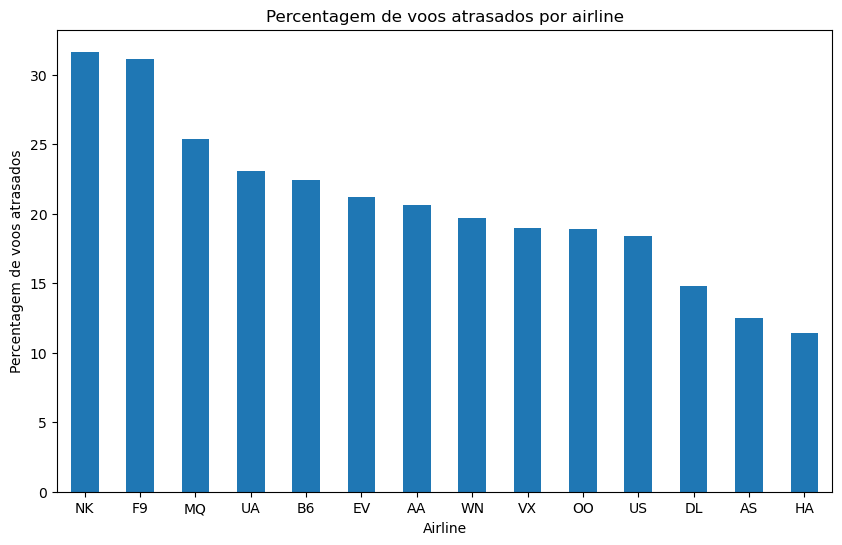

In [23]:
# Desenho/apresentação do gráfico de barras
percentagem_atraso_por_airline.plot.bar()
plt.xlabel('Airline')
plt.title('Percentagem de voos atrasados por airline')
plt.ylabel('Percentagem de voos atrasados')
plt.xticks(rotation = 0)
plt.show()

Como podem observar os atrasos variam imenso de companhia aérea para companhia aérea. 
<br><br>
Notem da importância de se efetuar esta análise usando percentagens e não o valor absoluto. Por exemplo, se a companhia aérea X tive 10 voos em atraso e a companhia aérea Y 100, o que isso nos diz? Na verdade muito pouco.. Pois a companhia aérea X pode ter um total de 30 voos e a Y um total de 2000, o que torna a situação bem diferente, não é verdade?

<div class="alert alert-success">
Q.12<br>
    Calcule o número de voos por dia da semana. Se quiser, apresente o resultado num gráfico.
</div>

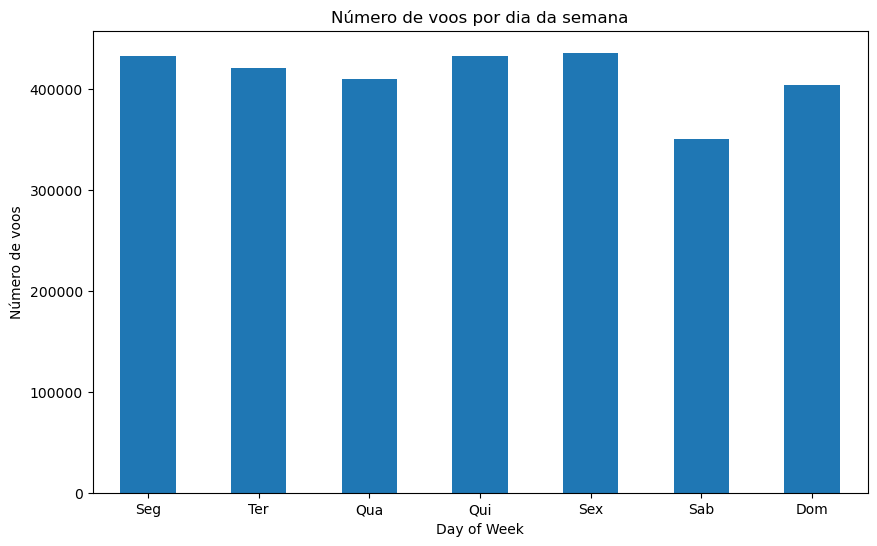

In [24]:
# number of flights per day of week

# Calcular o número de voos por dia e por semana 
voos_por_dia_da_semana = flights['day_of_week'].value_counts()

# Ordenar os dias da semana por ordem cronológica (de segunda a domingo)
ordem_dias_semana = ['Seg', 'Ter', 'Qua', 'Qui', 'Sex', 'Sab', 'Dom']
voos_por_dia_da_semana = voos_por_dia_da_semana.reindex(ordem_dias_semana)

# Desenho/apresentação do gráfico de barras
voos_por_dia_da_semana.plot.bar()
plt.xlabel('Day of Week')
plt.title('Número de voos por dia da semana')
plt.ylabel('Número de voos')
plt.xticks(rotation = 0)
plt.show()

A próxima pergunta é livre, ou seja, o objectivo é com base no que aprenderam até agora explorarem os dados de forma a extrair o máximo de insights úteis para o objetivo final do desafio do Kaggle: prever os voos que se irão atrasar.

<span class="badge">Nota:</span> Senão responderem não serão prejudicados, contudo, quanto mais fizerem mais pontos adicionais terão.

<div class="alert alert-warning">
Q.13<br>
    Apresente uma exploração ao dados feita por si.
</div>

In [25]:
# Calcular o número de voos cancelados por airline
airline_cancelled = flights.groupby(['airline'])['cancelled'].sum()

airline_cancelled

airline
AA     6659
AS      386
B6     3398
DL     3427
EV    10551
F9      375
HA       70
MQ    11337
NK     1271
OO     5650
UA     4437
US     4067
VX      357
WN    10850
Name: cancelled, dtype: int64

In [26]:
# Calcular o número de total de voos por cada airline
total_flights = flights.groupby("airline")["cancelled"].count()
total_flights

airline
AA    263700
AS     83458
B6    131107
DL    423711
EV    296881
F9     42747
HA     37736
MQ    161519
NK     55605
OO    291681
UA    250070
US    198715
VX     29238
WN    623344
Name: cancelled, dtype: int64

In [27]:
# Calcular a % de voos cancelados por airline 
cancelled_flights_percentage = (airline_cancelled/total_flights)*100
cancelled_flights_percentage

# Ordenar as percentagens por ordem decrescente
cancelled_flights_percentage = cancelled_flights_percentage.sort_values(ascending=False)

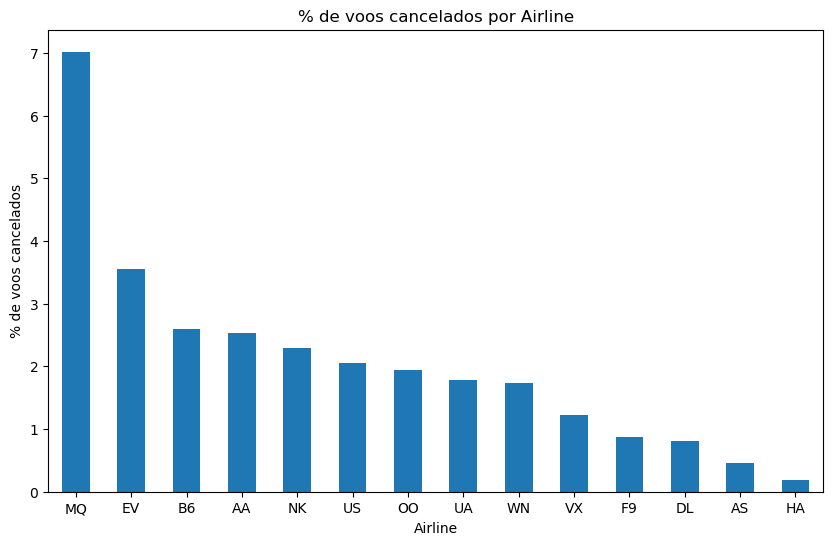

In [28]:
# Contrução do gráfico
cancelled_flights_percentage.plot.bar();

# Adicionar legendas e título ao gráfico
plt.xlabel('Airline')
plt.xticks(rotation = 0)
plt.ylabel('% de voos cancelados')
plt.title('% de voos cancelados por Airline');

In [29]:
# Calcular o número de voos desviados por airline 
airline_diverted = flights.groupby(['airline'])['diverted'].sum()

airline_diverted

airline
AA     943
AS     222
B6     404
DL     904
EV    1139
F9      85
HA      31
MQ     436
NK      95
OO     811
UA     753
US     425
VX      66
WN    1810
Name: diverted, dtype: int64

In [30]:
# Calcular o número de total de voos por cada airline
total_flights = flights.groupby("airline")["diverted"].count()
total_flights

airline
AA    263700
AS     83458
B6    131107
DL    423711
EV    296881
F9     42747
HA     37736
MQ    161519
NK     55605
OO    291681
UA    250070
US    198715
VX     29238
WN    623344
Name: diverted, dtype: int64

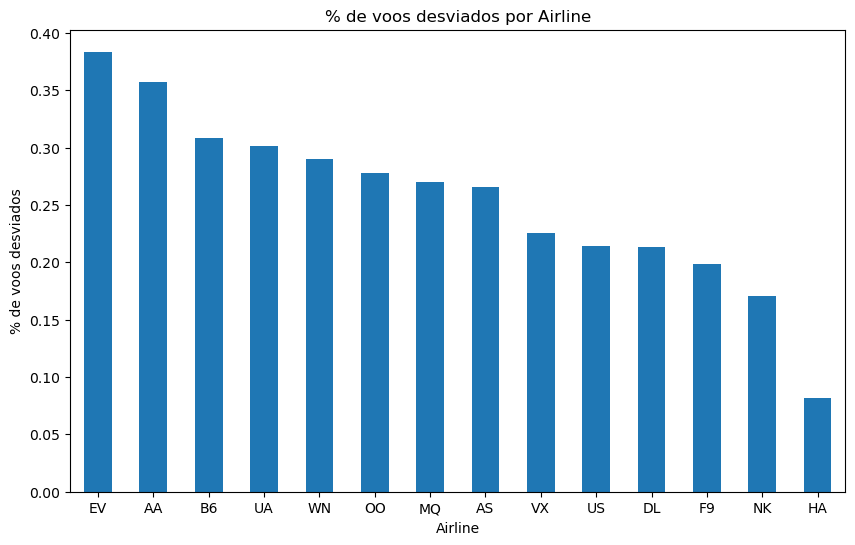

In [31]:
# Calcular a % de voos desviados por airline 
diverted_flights_percentage = (airline_diverted/total_flights)*100
diverted_flights_percentage

# Ordenar as percentagens por ordem decrescente
diverted_flights_percentage = diverted_flights_percentage.sort_values(ascending=False)

# Contrução do gráfico
diverted_flights_percentage.plot.bar();

# Adicionar legendas e título ao gráfico
plt.xlabel('Airline')
plt.xticks(rotation = 0)
plt.ylabel('% de voos desviados')
plt.title('% de voos desviados por Airline');

Com base nos últimos gráficos que mostram a % de voos cancelados e % de voos desviados por airline, podemos observar as seguintes conclusões:

- Airlines com maior % de voos desviados: EV, AA e B6.
- Airlines com maior % de voos cancelados: MQ, EV e B6.
- Airlines com maior % de voos atrasados: NK, F9 e MQ.

Podemos verificar que as airlines com maior incidência de voos desviados e cancelados não são as mesmas que têm um alto número de voos atrasados. Essa é uma observação relevante, pois sugere que as razões para voos desviados e cancelados podem ser diferentes das razões para voos atrasados.

No entanto, também foi notado que a % de voos cancelados e desviados é baixa em comparação com o total de voos, o que indica que esses eventos são relativamente raros. Isso pode ser considerado na construção do modelo, pois eventos raros podem não ter um impacto significativo na previsão geral.

Em suma, essa análise fornece informações sobre os padrões de desvios, cancelamentos e atrasos das diferentes airlines, mas é importante considerar a baixa ocorrência desses eventos ao desenvolver um modelo de previsão, já que eles podem não ser os principais fatores que influenciam os atrasos nos voos. Outros fatores, como condições climáticas, infraestrutura do aeroporto, capacidade da companhia aérea, entre outros, podem ter um papel mais relevante nas previsões de atraso.

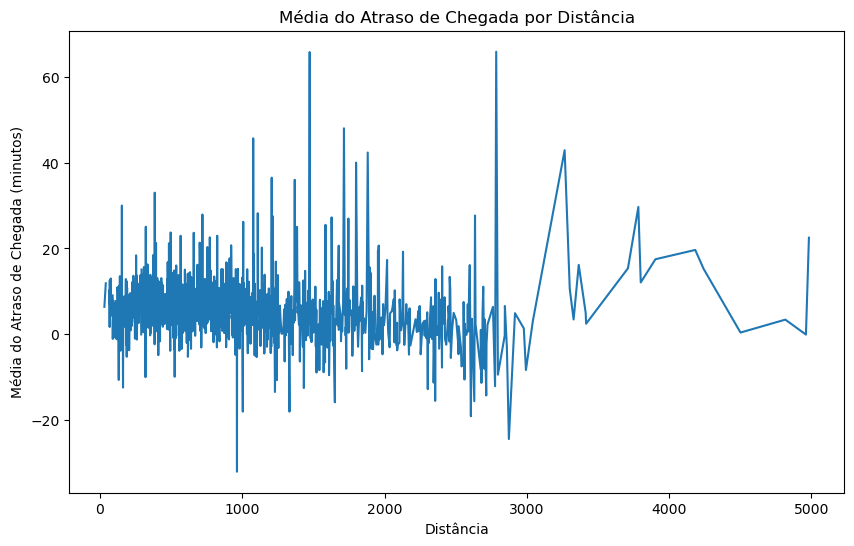

In [49]:
# Relação entre o atraso e a distância:
# Podemos verificar se existe alguma sazonalidade nos atrasos dos voos consoante a distância.

# Agrupar os voos por distância e calcular a média do atraso de chegada para cada distância
atraso_por_distancia = flights.groupby('distance')['arrival_delay'].mean()

# Desenho/apresentação do gráfico de barras
atraso_por_distancia.plot()
plt.xlabel('Distância')
plt.ylabel('Média do Atraso de Chegada (minutos)')
plt.title('Média do Atraso de Chegada por Distância')
plt.xticks(rotation = 0)
plt.show()

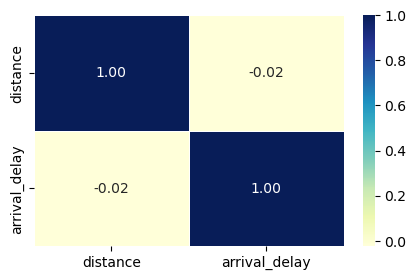

In [50]:
# Fazer uma matriz de correlação para analisar a correlação entre a distância e 'arrival_delay'
flights2 = flights[['distance', 'arrival_delay']].corr()

import seaborn as sns
# criar um mapa de cores dos valores da correlação
fig, ax = plt.subplots(figsize=(5, 3))
ax = sns.heatmap(flights2,
                 annot=True,
                 linewidths=0.5,
                fmt=".2f",
                cmap="YlGnBu");

Através do gráfico apresentado é difícil tirar conclusões sobre estas duas variáveis, por isso foi construída uma matriz de correlação por forma a verificar a correlação entre as variáveis 'distance' e 'arrival_delay'. Analisando a matriz de correlação entre estas duas variáveis, a correlação parece ser fraca uma vez que temos um valor de -0.02, e, um valor próximo de 0, indica uma correlação muito fraca ou quase nula entre as variáveis em questão. Nesse caso, não há uma relação linear aparente entre as variáveis, e qualquer relação que possa existir é muito fraca.
Contudo, quando o valor de correlação está próximo de -1 ou 1, indica que as variáveis estão fortemente correlacionadas e há uma relação consistente entre elas. No entanto, como o valor está próximo de 0 (-0.02), indica que não há uma relação significativa entre as variáveis e elas variam independentemente uma da outra.

___
### 5. Desafios
___

Nesta secção terão de fazer um dos desafios. Nos restantes desafios respondidos terão pontos adicionais.

___
#### Problema 1: Implementar one hot enconding (OHE)

O interesse de usar técnicas como [OHE](https://hackernoon.com/what-is-one-hot-encoding-why-and-when-do-you-have-to-use-it-e3c6186d008f) deve-se ao facto de alguns algoritmos assumirem que todas as colunas são numéricas, limitando imenso os dados que se pode usar. OHE é uma das técnicas que permite dar a volta a esta limitação.

O que o OHE faz é transformar uma coluna categórica (ou string) em `N` novas colunas com o valor 0 ou 1, sendo `N` o número de valores de domínio da coluna.

Veja o seguinte exemplo:

```python
# OHE Example using get_dummies
> df = pd.DataFrame({'country': ['russia', 'germany', 'australia','korea','germany']})
> print(df)

     country
0     russia
1    germany
2  australia
3      korea
4    germany

> pd.get_dummies(df, columns=['country'])

   country_australia  country_germany  country_korea  country_russia
0                  0                0              0               1
1                  0                1              0               0
2                  1                0              0               0
3                  0                0              1               0
4                  0                1              0               0
``` 

Contudo esta abordagem é limitada, pois se tivermos uma coluna com 1 milhão de valores de domínio possíveis, mas apenas 10 importam, adicionar 1 milhão de colunas irá gerar outros problemas. Esta é a abordagem que o pandas permite fazer usando o comando `get_dummies`. 

O que se pretende com este exercício é desenvolver de raíz uma função que implimente o OHE **sem usar nenhuma biblioteca que já calcule OHE** (como o `get_dummies` ou o `sklearn.preprocessing.OneHotEncoder`) passando por argumento os valores de domínio a considerar. Ou seja:

Escrever a função:

```python
def apply_ohe(df, column, categories)
```

que dado um dataframe `df`, a coluna `column` a considerar e uma lista de valores de domínio `categories` devolve o mesmo dataframe original com a respetiva transformação usando OHE.

Por exemplo:

```python
> df = pd.DataFrame({'country': ['russia', 'germany', 'australia','korea','germany']})
> print(df)

     country
0     russia
1    germany
2  australia
3      korea
4    germany

> apply_ohe(df, 'country', ['russia', 'australia'])

     country  country_russia  country_australia
0     russia               1                  0
1    germany               0                  0
2  australia               0                  1
3      korea               0                  0
4    germany               0                  0
``` 

In [41]:
df = pd.DataFrame({'country': ['russia', 'germany', 'australia','korea','germany']})

def apply_ohe(df, column, categories):
   
    for category in categories: 
        #Cria uma nova coluna
        df[column + '_' + str(category)] = (df[column].apply(lambda x: int(x == category)))
    
    return df

df = apply_ohe(df, 'country', ['russia', 'australia'])

print(df)

     country  country_russia  country_australia
0     russia               1                  0
1    germany               0                  0
2  australia               0                  1
3      korea               0                  0
4    germany               0                  0


___
#### Problema 2: PermCheck do Codility.
</div>

https://app.codility.com/programmers/lessons/4-counting_elements/perm_check/

Uma permutação é uma sequência de tamanho `N` que contem todos os elementes de 1 até `N`, uma e uma só vez.

Por exemplo, a seguinte lista A:

```python
    A[0] = 4
    A[1] = 1
    A[2] = 3
    A[3] = 2
```

é uma permutação, mas a seguinte lista A:

```python
    A[0] = 4
    A[1] = 1
    A[2] = 3
```

já não o é, pois falta o valor 2. 

O objectivo é verificar que uma dada lista A é uma permutação.

Escrever uma função:

```python
def solution(A)
```

que, dado uma lista `A` retorna 1 se `A` for uma permutação e 0 caso contrário.


Por exemplo, para a seguinte lista `A`:

```python
    A[0] = 4
    A[1] = 1
    A[2] = 3
    A[3] = 2
```

a função deve retornar 1.

E para a seguinte lista `A`:

```python
    A[0] = 4
    A[1] = 1
    A[2] = 3
```

a função deve retornar 0.

In [44]:
def solution(A):
    # 1. Obter o tamanho da lista A
    n = len(A)
    
    # 2. Calcular a soma esperada dos elementos de 1 a N (inclusive)
    expected_sum = n * (n + 1) // 2
    
    # 3. Calcular a soma dos elementos da lista A
    current_sum = sum(A) 
    
    # 4. Criar um conjunto de elementos únicos presentes na lista A
    unique_elements_in_A = set(A)

    # 5. Verificar se o número de elementos únicos na lista é igual a N
    #    e se a soma dos elementos da lista é igual à soma esperada.
    if len(unique_elements_in_A) == n and expected_sum == current_sum:
        return 1  # A lista é uma permutação, retorna 1.
    else:
        return 0  # A lista não é uma permutação, retorna 0.


print(f"A lista A retorna 1 se A for uma permutação: {solution([4, 1, 3, 2])}")
print(f"A lista A retorna 0 se A não for uma permutação: {solution([4, 1, 3])}")


A lista A retorna 1 se A for uma permutação: 1
A lista A retorna 0 se A não for uma permutação: 0


___
#### Problema 3: MaxCounters do Codility.

https://app.codility.com/programmers/lessons/4-counting_elements/max_counters/

Dada uma lista contador de tamanho `N`, iniciada com 0 em todas as entradas, duas operações são permitidas:

* aumentar(X) - o índice X é incrementado de 1,
* valor max - todas os índices são alterados para o valor máximo que se encontra na lista.

Uma lista `A` de tamanho `M` é dada com operações consecutivas:

* se A[K] = X, tal que 1 ≤ X ≤ N, então a operação K é aumentar(X)
* se A[K] = N + 1, então a operação é valor max

Por exemplo, dado `N = 5` e a segunte lista `A`:

```python
    A[0] = 3
    A[1] = 4
    A[2] = 4
    A[3] = 6
    A[4] = 1
    A[5] = 4
    A[6] = 4
```

os valores da lista contador a seguir a cada operação serão os seguintes:

```python
    (0, 0, 1, 0, 0)
    (0, 0, 1, 1, 0)
    (0, 0, 1, 2, 0)
    (2, 2, 2, 2, 2)
    (3, 2, 2, 2, 2)
    (3, 2, 2, 3, 2)
    (3, 2, 2, 4, 2)
```

O objectivo é calcular o valor da lista contador após cada operação.

Escrever uma função:

```python
def solution(N, A)
```

que, dada um valor inteiro `N` e uma lista `A` com `M` operações, retorna a lista contador apoś aplicar todas as operações.

Por exemplo, dado:

```python
    A[0] = 3
    A[1] = 4
    A[2] = 4
    A[3] = 6
    A[4] = 1
    A[5] = 4
    A[6] = 4
```

a função deve retornar [3, 2, 2, 4, 2].

In [34]:
def solution(N, A):
    # lista de contadores, iniciada com N elementos, todos com valor 0. 
    # Esta lista representa os contadores que serão incrementados durante as operações.
    counters = [0] * N
    
    # variável que armazena o valor máximo encontrado até o momento durante as operações, começando a 0.
    max_counter = 0
    
    # variável que acompanha o valor máximo temporário durante as operações. 
    # é atualizada a cada operação do tipo "aumentar(X)".
    current_max = 0

    for operation in A:
        # aqui irá se verificar se a operação é do tipo "aumentar(X)" ou "valor max".
        if 1 <= operation <= N:
            
            # Operação "aumentar(X)"
            if counters[operation - 1] < max_counter:
                counters[operation - 1] = max_counter
            counters[operation - 1] += 1
            
            if counters[operation - 1] > current_max:
                current_max = counters[operation - 1]
        elif operation == N + 1:
            # Operação "valor max"
            max_counter = current_max

    # Atualização final dos contadores
    for i in range(N):
        if counters[i] < max_counter:
            counters[i] = max_counter

    return counters

N = 5
A = [3, 4, 4, 6, 1, 4, 4]
print(solution(N, A))

[3, 2, 2, 4, 2]
